In [25]:
# Importing usefull libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [2]:
# Importing some scripts

from scripts.data_vizualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
from scripts.data_transformation import DataTransformer

DC = DataCleaner()
DV = Data_Viz()
DT = DataTransformer()

In [3]:
# Reading the datasets

train_data = pd.read_csv('../data/train_store.csv')
test_data = pd.read_csv('../data/test_store.csv')

#### 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
# Finding out the total promotion percentage in both the training and test dataset

promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

In [5]:
# Printing the number of percentages

print(f'There are {promo_test_percentage:.2%} of promotion in the test data set ')
print(f'There are {promo_train_percentage:.2%} of promotion in the train data set ')

There are 39.58% of promotion in the test data set 
There are 38.15% of promotion in the train data set 


In [6]:
# Creating a test and train promo data frame for visualization

promo_test_df = test_data['Promo'].value_counts()
promo_train_df = train_data['Promo'].value_counts()

In [7]:
# Creating a data frame for visualization

test_df = pd.DataFrame(promo_test_df)
train_df = pd.DataFrame(promo_train_df)

In [21]:
# Renaming the columns for visualization

promo = [0,1]
test_df['Promotion'] = promo
train_df['Promotion'] = promo
test_df.rename(columns={'Promo':'Count'},inplace=True)
train_df.rename(columns={'Promo':'Count'},inplace=True)

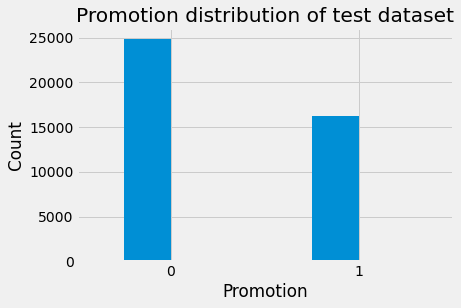

In [24]:
# Plotting the test promo distribution 

test_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of test dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/test_dataset_promo_distribution.png')

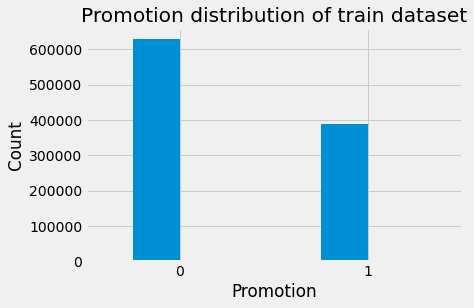

In [23]:
# Plotting the train promo distribution 

train_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of train dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/train_dataset_promo_distribution.png')

In [ ]:
DV.plotco

##### From the above graphs and percentage prints we can see that the promotion is distributed in both the train and test data similarly